# Aplicação da Base Iris em Regressão Logística

Esse projeto faz parte de um exercício proposto pelo curso de analytics da Preditiva AI.

Essa aplicação faz parte do módulo 6 sobre regressão logística

O objetivo aqui é fazer uma análise utilizando a regressão logística para prever o tipo de orquídia com base em características da flor

### FAZER:
- Comentar o que estou fazendo com markdowns
- Interpretar os coeficientes e intercepto
- Transformar grafico final naquele com pontos por observacoes
- Comparar com o video de gabarito e ir modificando o notebook


## Preparação

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                              f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay)

In [3]:
iris = pd.read_csv("iris.csv")

In [4]:
iris.head()

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,Tipo_Orquidea
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


## EDA

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   comprimento_sepala  150 non-null    float64
 1   largura_sepala      150 non-null    float64
 2   comprimento_petala  150 non-null    float64
 3   largura_petala      150 non-null    float64
 4   Tipo_Orquidea       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


Podemos ver que não existem casos nulos ou não preenchidos nas 150 observações presentes na tabela. 
Vejamos como se distribuem os dados

In [6]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
comprimento_sepala,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
largura_sepala,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
comprimento_petala,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
largura_petala,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
Tipo_Orquidea,150.0,0.333333,0.472984,0.0,0.0,0.00,1.0,1.0


Olhando a distribuição dos quartis não parece haver casos muito discrepantes em nenhuma coluna. Obviamente, a variação de `comprimento_sepala` e `largura_sepala` parece ser bem mais próxima da distribuição normal do que as referentes à petala. Ainda assim, para regressão logística, o pressuposto da normalidade não é tão rigoroso quanto outras técnicas paramétricas. Vejamos apenas visualmente via histogramas se outliers podem acabar aparecendo e distorcendo a análise

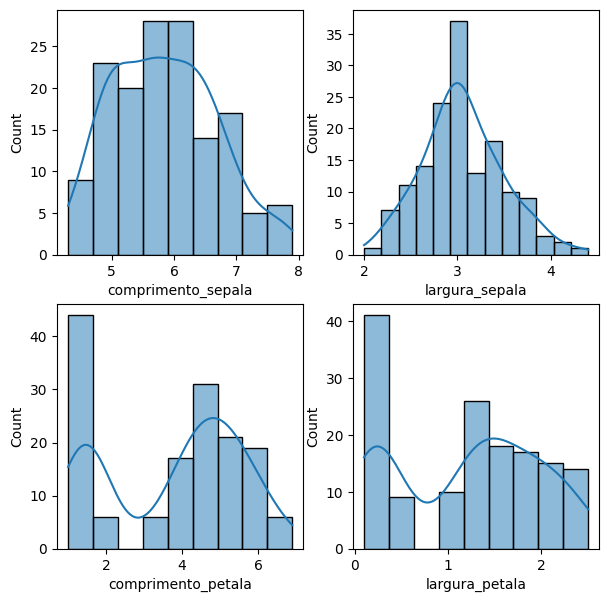

In [7]:
figs, axs = plt.subplots(2, 2, figsize = (7, 7))

sns.histplot(data=iris, x= "comprimento_sepala", kde = True, ax = axs[0, 0])
sns.histplot(data=iris, x= "largura_sepala", kde = True, ax = axs[0, 1])
sns.histplot(data=iris, x= "comprimento_petala", kde = True, ax = axs[1, 0])
sns.histplot(data=iris, x= "largura_petala", kde = True, ax = axs[1, 1]);


Conforme mencionamos, a distribuição das petalas (largura e comprimento) não condiz com o princípio gaussiano. Ainda assim, casos desviantes não parecem ser o problema aqui. 

In [8]:
iris.value_counts("Tipo_Orquidea", normalize=True)

Tipo_Orquidea
0    0.666667
1    0.333333
Name: proportion, dtype: float64

Vale a pena notar que 66% dos casos são classificados como orquídia do tipo 0 e 33% do tipo 1. Existe então a probabilidade mais alta de ser 0 em detrimento do 1.

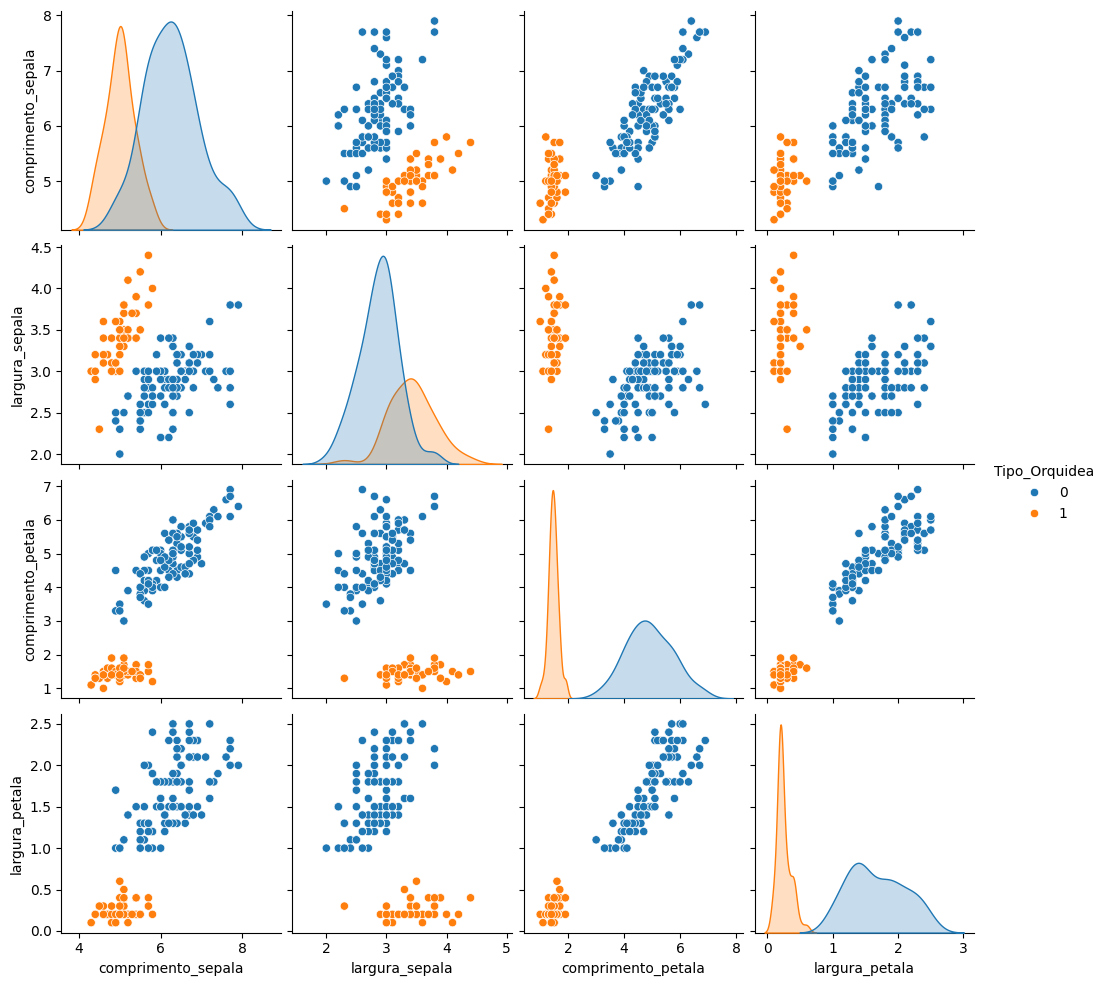

In [9]:
sns.pairplot(iris, hue="Tipo_Orquidea")

Esse grºafico é promissor. Pois ele mostra que a combinação dessas variºaveis parece ser suficiente para criar um ponto de separação claro entre orquídeas do tipo 0 e do tipo 1. Os histogramas com a distribuição bem afastadas é um ótimo exemplo disso. Vamos então modelar.

## Modelagem

Para modelagem, as próximas linhas de código seapara as features da taget, cria um conjunto de teste e de treinamento e instancia e roda o algoritmo de regressão logística.

In [10]:
iris.columns

Index(['comprimento_sepala', 'largura_sepala', 'comprimento_petala',
       'largura_petala', 'Tipo_Orquidea'],
      dtype='object')

In [11]:
y = iris[["Tipo_Orquidea"]]

In [12]:
X = iris[['comprimento_sepala', 'largura_sepala', 'comprimento_petala','largura_petala']]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

In [14]:
modelo_regLog = LogisticRegression(fit_intercept=True)

In [15]:
modelo_regLog.fit(X_train, y_train)

/Users/feliperocha/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

Tipo de Orquidea = B0 + B1 * comprimento_sepala + B2 * largura_sepala + B3 * comprimento_petala + B4 * largura_petala

In [29]:
print(f"{modelo_regLog.intercept_ = }")

modelo_regLog.intercept_ = array([6.49025114])


Mantendo todas as variáveis zeradas, existe uma probabilidade positiva de 6.49 no ln da odds de ser do tipo 1. Confuso sim? Uma forma de interpretar isso é via percentual

In [17]:
((np.exp(modelo_regLog.intercept_) - 1) * 100)

array([65768.87667949])

Caso todas as variáveis fossem zeradas, a chance de ser orquidia do tipo 1 aumenta em 65768% 

Vejamos abaixo os coeficientes:

In [18]:
modelo_regLog.coef_

array([[-0.44642647,  0.74250861, -2.1278386 , -0.86715708]])

Primerio, veremos a direção do efeito e depois (embaixo percentual) o quanto cada feature contribui com a modelagem.
- comprimento_sepala contribui negativamente com o fato de ser orquídia do tipo 1 portanto a favor do tipo 0
- largura_sepala por sua vez contribui positivamente e assim a favor do tipo 1
- comprimento_petala contribui negativamente e afavor do tipo 0
- largura_petala contribui negativamente também

In [19]:
(np.exp(modelo_regLog.coef_) - 1) * 100

array([[-36.00891888, 110.11999901, -88.09055735, -57.98557112]])

No caso das magnitudes, temos que: 

In [20]:
y_pred = modelo_regLog.predict(X_test)

## Métricas

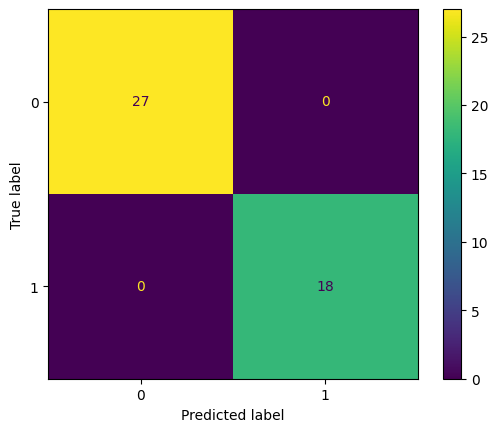

In [21]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [22]:
accuracy_score(y_test, y_pred)

1.0

In [23]:
precision_score(y_test, y_pred)

1.0

In [24]:
recall_score(y_test, y_pred)

1.0

In [25]:
f1_score(y_test, y_pred)

1.0

In [26]:
roc_auc_score(y_test, y_pred)

1.0

<Axes: xlabel='largura_petala', ylabel='Tipo_Orquidea'>

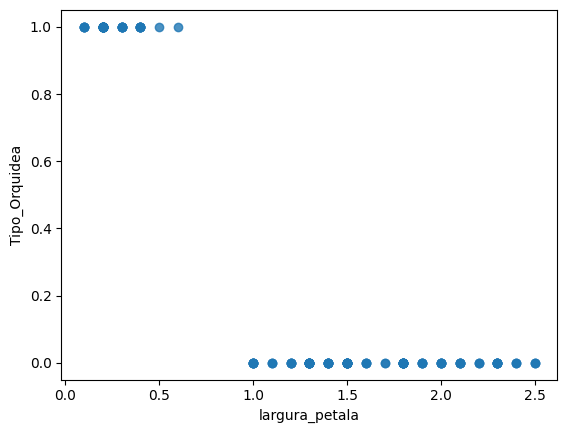

In [27]:
sns.regplot(x = X[["largura_petala"]], y = y, logistic=True, ci = None)